### FATHIMA SULTHANA PP

#                            PROJECT AEROFIT TREADMILL

### The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.



### 1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.<br>2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business



## Problem Statement

. Study the data set for data cleaning and preprocessing
. Detect outliers in the data set using boxplot and describe function
. Understand the distribution of data for the quantitative attributes
. Understand correlations of data among the quantitative attributes
. Univariate, bivariate & multivariate analysis to check relationship between different features
. Calculate marginal probability on each columns to find the percent of occurence
. Apply conditional probability on different features to analyse market of the products
. Calculate expected price for selling 100 products

In [119]:
import  pandas as pd
import  seaborn as sns
import  matplotlib.pyplot as plt
import  numpy as np

In [120]:
df=pd.read_csv('aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Except Product,Gender $ MaritalStatus are integers  

In [122]:
df.shape

(180, 9)

dafaframe has 180 rows and 9 columns

In [123]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [124]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [125]:
for i in df.columns:
    print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [126]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [1]:
df.describe(include="all")

NameError: name 'df' is not defined

In [128]:
df['Product'].nunique()

3

In [129]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

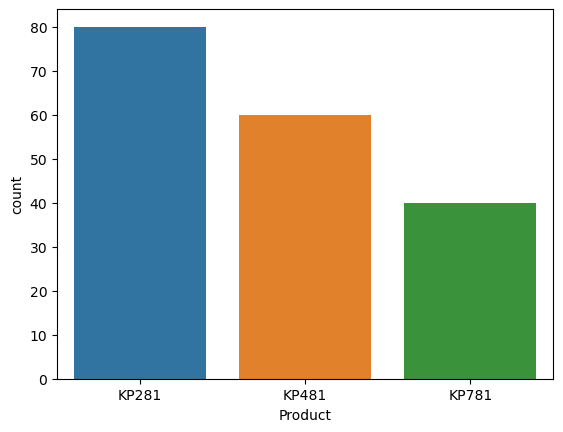

In [130]:
sns.countplot(x="Product",data=df)
plt.show()

from the plot we got that most sold treadmill product is KP281

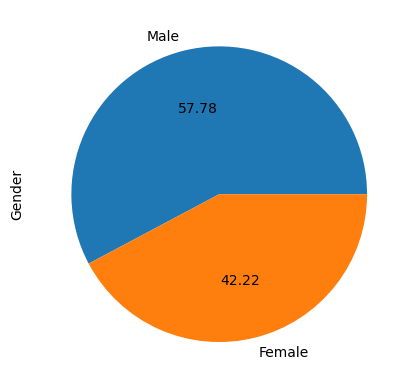

In [131]:
df.Gender.value_counts().plot(kind="pie",autopct="%.2f")
plt.show()

most of the customers are male

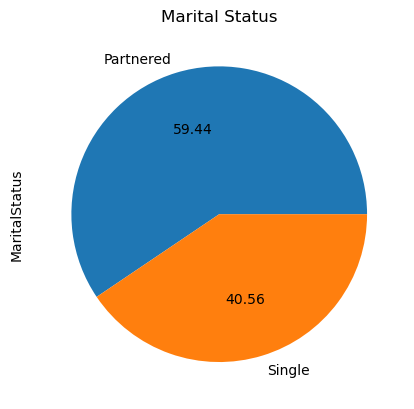

In [132]:
df.MaritalStatus.value_counts().plot(kind="pie",autopct="%.2f")
plt.title('Marital Status')
plt.show()

most of the customers are partnered

In [133]:
df.Education.value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

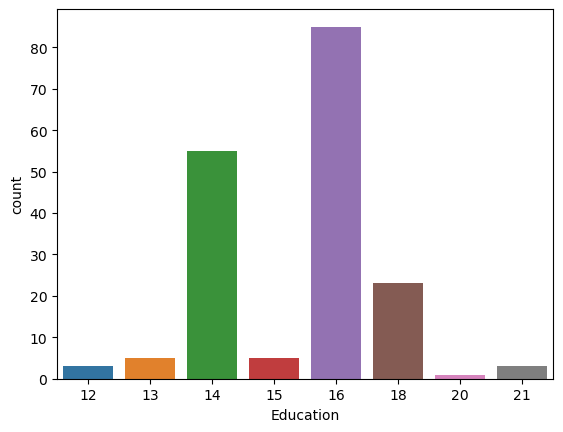

In [134]:
sns.countplot(x='Education',data=df)
plt.show()

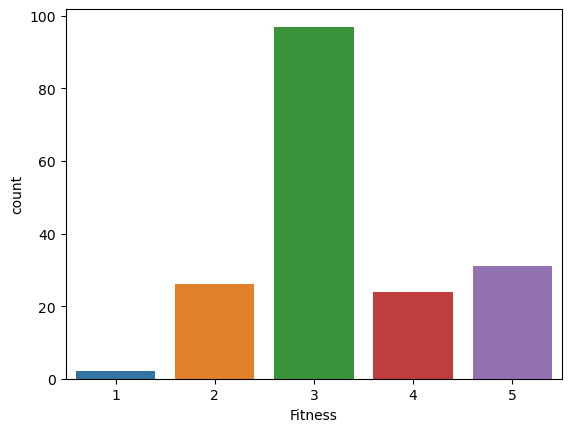

In [135]:
sns.countplot(x='Fitness',data=df)
plt.show()

most of the customers attain fitness level 3

In [136]:
df_miles=df.copy()

In [137]:
df_miles['Age'] = pd.cut(df_miles['Age'],bins=[17,24,30,36,42,48,54],labels=['18-24','24-30','30-36','36-42','42-48','48-54'])
df_miles['Income'] = pd.cut(df_miles['Income'],bins=[20000,40000,60000,80000,100000,120000],labels=['20k-40k','40k-60k','60k-80k','80k-100k','100k-120k'])
df_miles

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18-24,Male,14,Single,3,4,20k-40k,112
1,KP281,18-24,Male,15,Single,2,3,20k-40k,75
2,KP281,18-24,Female,14,Partnered,4,3,20k-40k,66
3,KP281,18-24,Male,12,Single,3,3,20k-40k,85
4,KP281,18-24,Male,13,Partnered,4,2,20k-40k,47
...,...,...,...,...,...,...,...,...,...
175,KP781,36-42,Male,21,Single,6,5,80k-100k,200
176,KP781,36-42,Male,18,Single,5,4,80k-100k,200
177,KP781,42-48,Male,16,Single,5,5,80k-100k,160
178,KP781,42-48,Male,18,Partnered,4,5,100k-120k,120


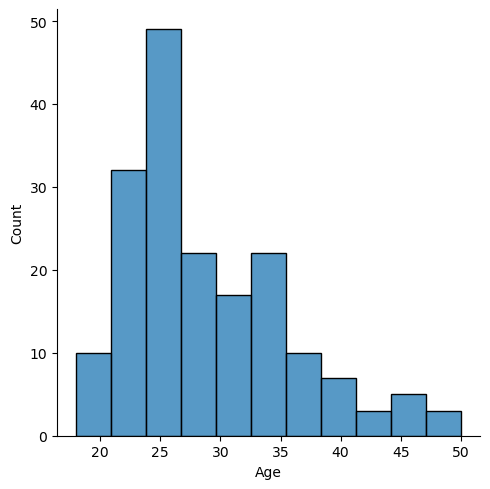

In [138]:
sns.displot(x='Age',data=df)
plt.show()

In [139]:
df.Age.value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

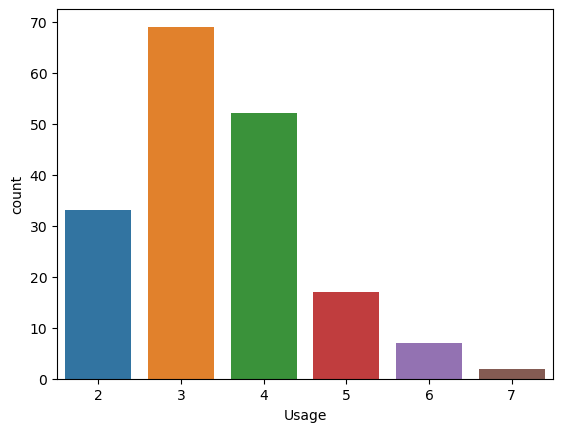

In [140]:
sns.countplot(x='Usage',data=df)
plt.show()

The average number of times the customer plans to use the treadmill each week are 3

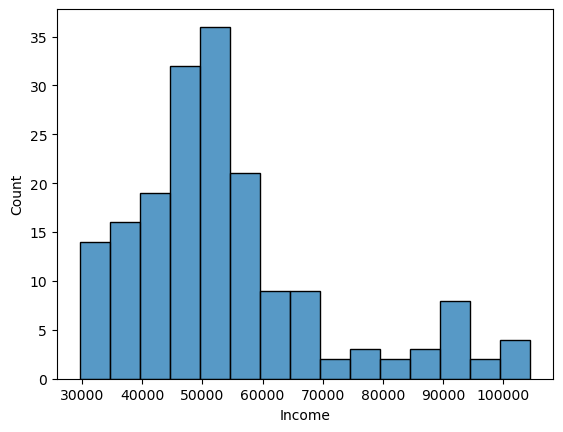

In [141]:
sns.histplot(x='Income',data=df)
plt.show()

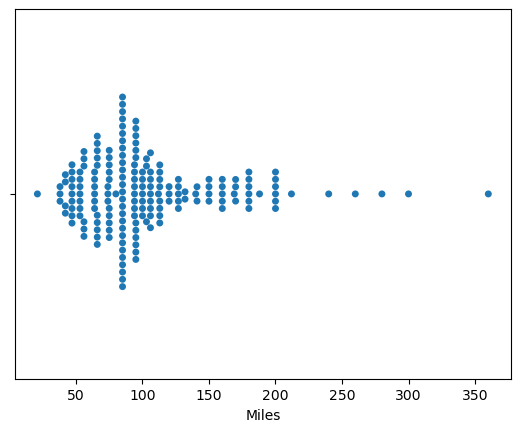

In [142]:
sns.swarmplot(x="Miles",data=df)
plt.show()

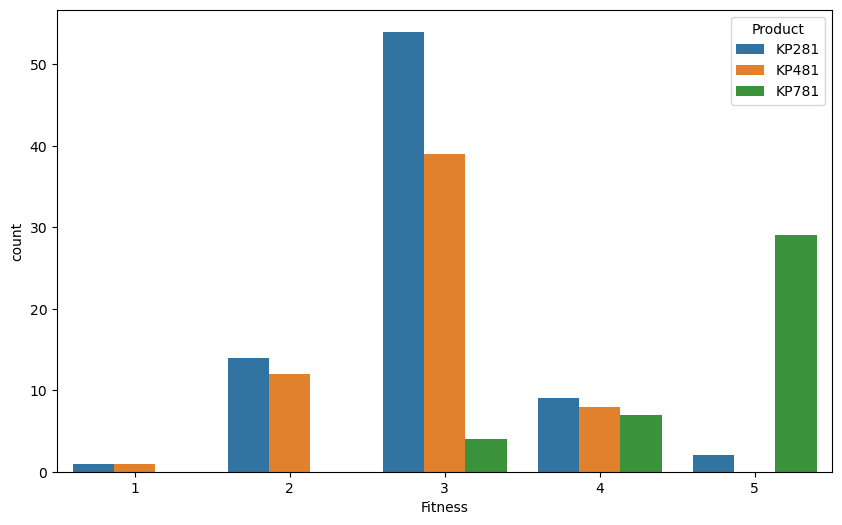

In [143]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Fitness', data = df,hue='Product')
plt.show()

by using machine KP281, most people attain fitness level 3

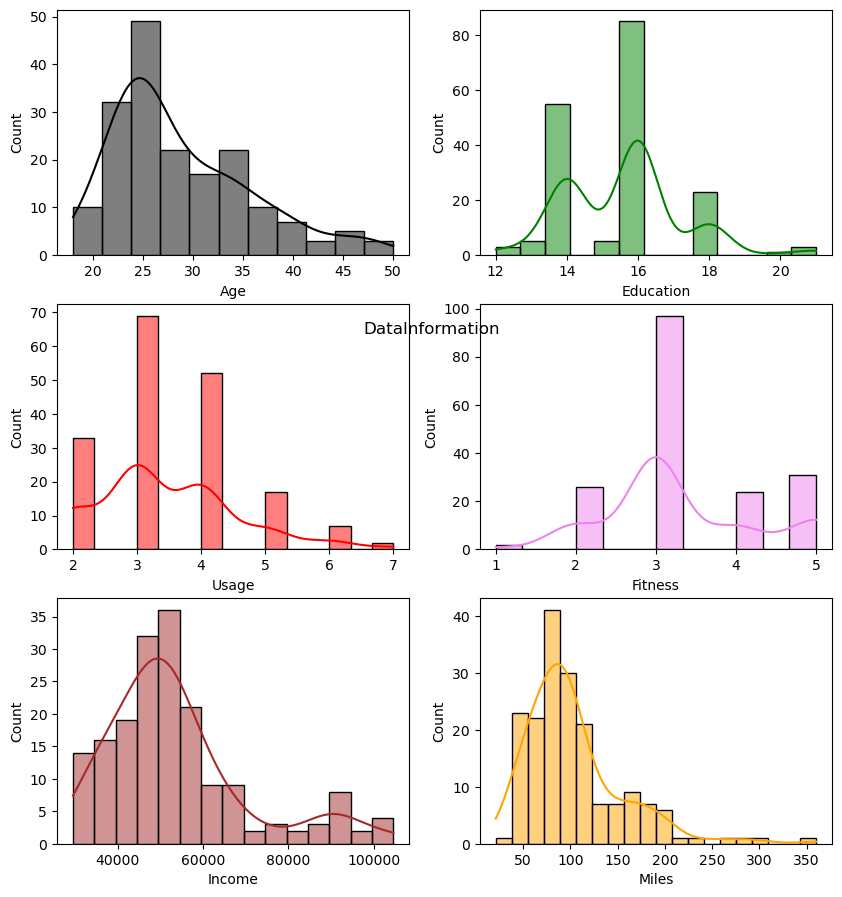

In [144]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))
fig.subplots_adjust(top=1.5)

sns.histplot(data=df, x="Age", kde=True,color="black", ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True,color="green", ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True,color="violet", ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True,color="brown", ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True,color="orange", ax=axis[2,1])
fig.suptitle('DataInformation')
plt.show()


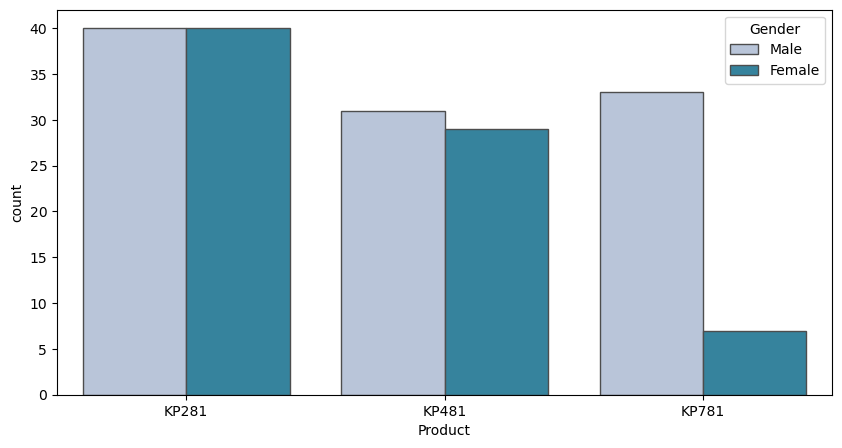

In [145]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Product', data = df, palette='PuBuGn',edgecolor='0.3', hue='Gender')
plt.show()

KP281 is the mostly used machine by both male and female

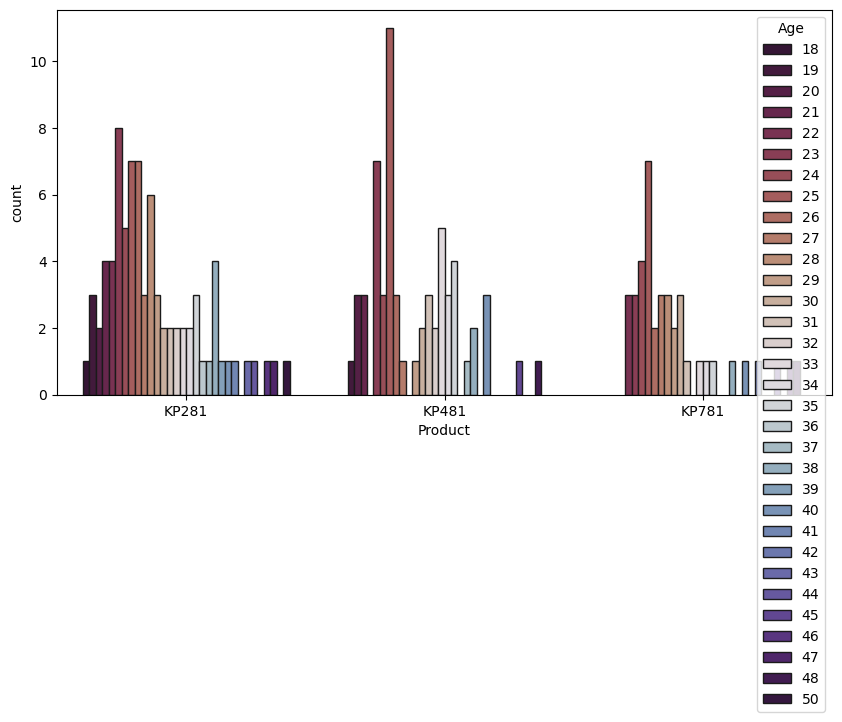

In [146]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Product', data = df, palette='twilight_shifted_r',edgecolor='0.1', hue='Age')
plt.show()

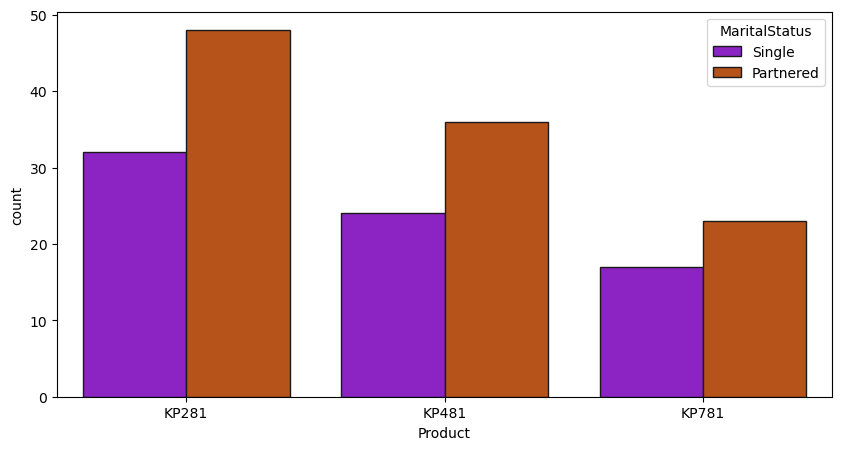

In [147]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Product', data = df, palette='gnuplot',edgecolor='0.1', hue='MaritalStatus')
plt.show()

## correlation

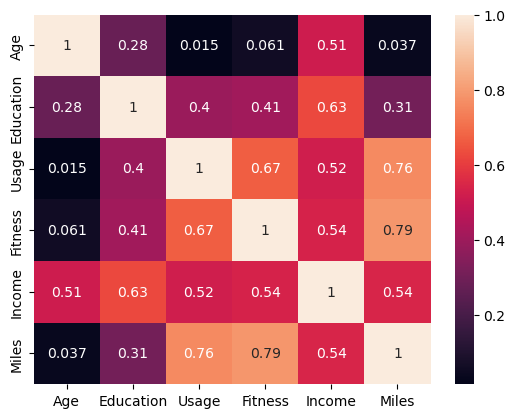

In [148]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Pairplot

<Figure size 800x800 with 0 Axes>

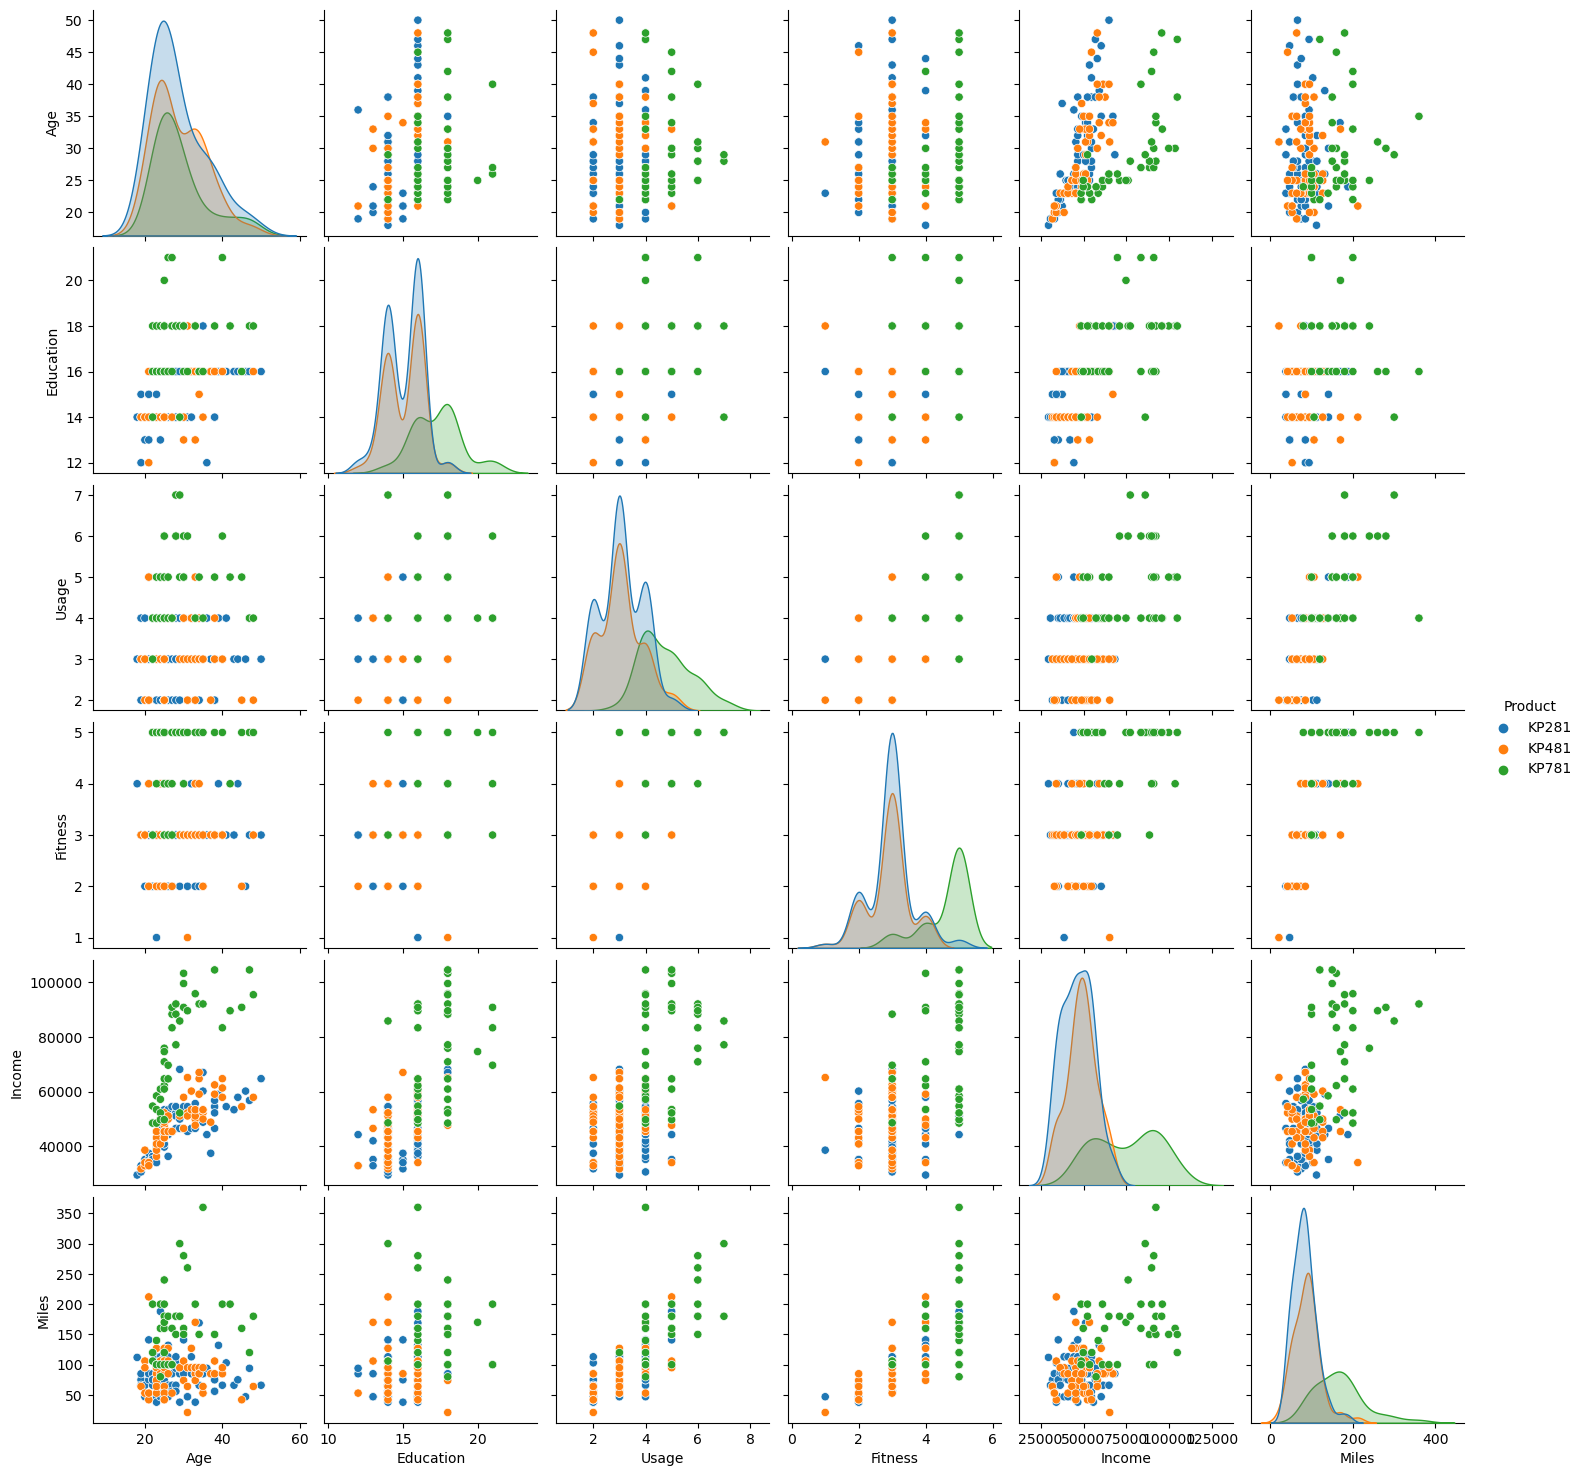

In [149]:
plt.figure(figsize=(8,8))
sns.pairplot(data = df, hue= 'Product')
plt.show()

# outliers

In [150]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


from this we can say that in age education usage and in fitness the difference between mean and medians are unnoticable. But in income and miles there is large difference so the possibilty of finding outlier values in these are high

In [151]:
df1=df[['Age','Education','Usage','Fitness','Income','Miles']]
df1

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47
...,...,...,...,...,...,...
175,40,21,6,5,83416,200
176,42,18,5,4,89641,200
177,45,16,5,5,90886,160
178,47,18,4,5,104581,120


In [152]:
for i in df1:
    print('mean value of ',i,df[i] .mean())

mean value of  Age 28.788888888888888
mean value of  Education 15.572222222222223
mean value of  Usage 3.4555555555555557
mean value of  Fitness 3.311111111111111
mean value of  Income 53719.57777777778
mean value of  Miles 103.19444444444444


In [153]:
for i in df1:
    print('median of ',i,df[i] .median())


median of  Age 26.0
median of  Education 16.0
median of  Usage 3.0
median of  Fitness 3.0
median of  Income 50596.5
median of  Miles 94.0


In [154]:
df1['Age'].mean()-df1['Age'].median()

2.788888888888888

In [155]:
df1['Education'].mean()-df1['Education'].median()

-0.42777777777777715

In [156]:
df1['Usage'].mean()-df1['Usage'].median()

0.4555555555555557

In [157]:
df1['Fitness'].mean()-df1['Fitness'].median()

0.3111111111111109

In [158]:
df1['Income'].mean()-df1['Income'].median()

3123.0777777777766

In [159]:
df1['Miles'].mean()-df1['Miles'].median()

9.194444444444443

miles and income highly likely to have outlier values

# miles and products

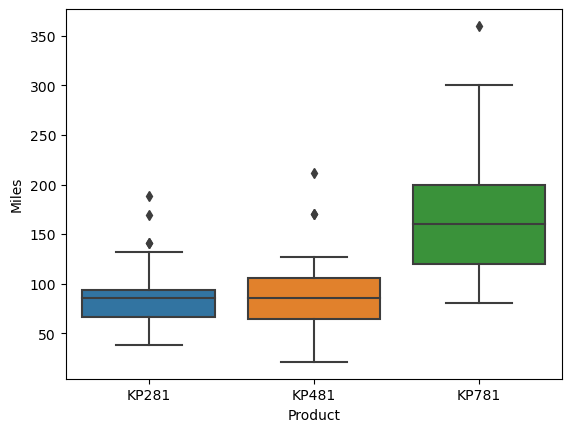

In [160]:
sns.boxplot(data=df,x='Product',y='Miles')
plt.show()

In [161]:
df_PM=df.copy()

df_PM

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# Product_KP281

In [162]:
KP281=df_PM[df_PM['Product']=='KP281']

KP281

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
75,KP281,43,Male,16,Partnered,3,3,53439,66
76,KP281,44,Female,16,Single,3,4,57987,75
77,KP281,46,Female,16,Partnered,3,2,60261,47
78,KP281,47,Male,16,Partnered,4,3,56850,94


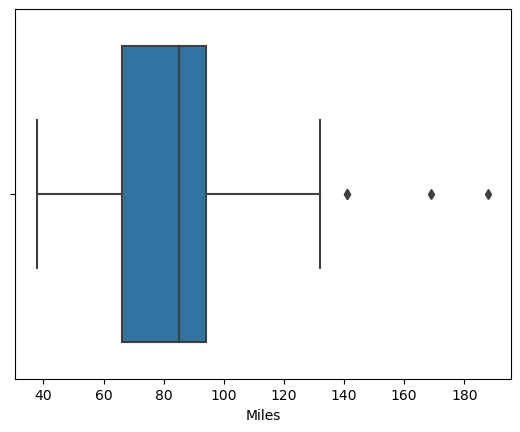

In [163]:
sns.boxplot(data=KP281,x='Miles')
plt.show()

In [164]:
q1=KP281['Miles'].quantile(.25)
q1

66.0

In [165]:
q2=KP281['Miles'].median()
q2

85.0

In [166]:
q3=KP281['Miles'].quantile(0.75)
q3

94.0

In [167]:
iqr=q3-q1
iqr


28.0

In [168]:
lower=q1-(1.5)*iqr
lower

24.0

In [169]:
upper=q3+(1.5)*iqr
upper

136.0

In [170]:
df_11=KP281[(KP281['Miles']>q1-1.5*iqr)&(KP281['Miles']<q3+1.5*iqr)]
df_11

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
75,KP281,43,Male,16,Partnered,3,3,53439,66
76,KP281,44,Female,16,Single,3,4,57987,75
77,KP281,46,Female,16,Partnered,3,2,60261,47
78,KP281,47,Male,16,Partnered,4,3,56850,94


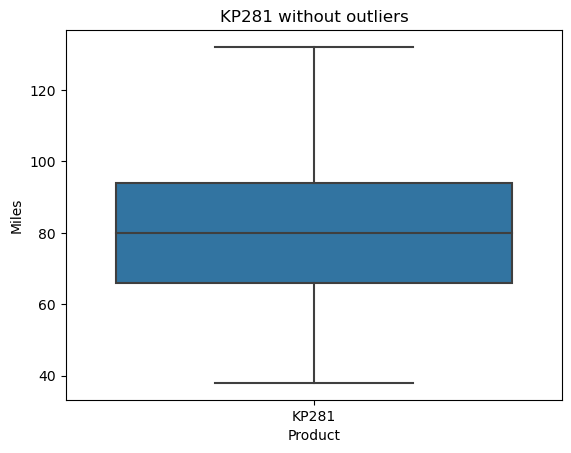

In [171]:
sns.boxplot(x='Product',y='Miles',data=df_11)
plt.title('KP281 without outliers')
plt.show()

# Product_KP481

In [172]:
KP481=df_PM[df_PM['Product']=='KP481']
KP481


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53
82,KP481,20,Female,14,Partnered,3,3,34110,106
83,KP481,20,Male,14,Single,3,3,38658,95
84,KP481,21,Female,14,Partnered,5,4,34110,212
85,KP481,21,Male,16,Partnered,2,2,34110,42
86,KP481,21,Male,12,Partnered,2,2,32973,53
87,KP481,23,Male,14,Partnered,3,3,36384,95
88,KP481,23,Male,14,Partnered,3,3,38658,85
89,KP481,23,Female,16,Single,3,3,45480,95


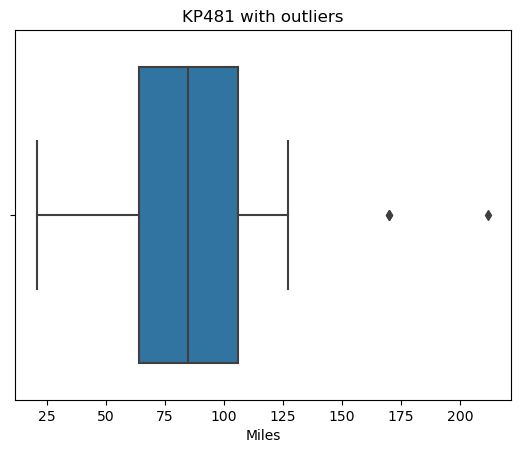

In [173]:
sns.boxplot(data=KP481,x='Miles')
plt.title('KP481 with outliers')
plt.show()

In [174]:
q2_1=KP481['Miles'].quantile(.25)
q2_1

64.0

In [175]:
q2_2=KP481['Miles'].quantile(.5)
q2_2

85.0

In [176]:
q2_3=KP481['Miles'].quantile(.75)
q2_3

106.0

In [177]:
iqr= q2_3 - q2_1
iqr

42.0

In [178]:
lower=q2_1-(1.5)*iqr
lower

1.0

In [179]:
upper=q2_3+(1.5)*iqr
upper

169.0

In [180]:
df_22=KP481[(KP481['Miles']>q1-1.5*iqr)&(KP481['Miles']<q3+1.5*iqr)]
df_22

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53
82,KP481,20,Female,14,Partnered,3,3,34110,106
83,KP481,20,Male,14,Single,3,3,38658,95
85,KP481,21,Male,16,Partnered,2,2,34110,42
86,KP481,21,Male,12,Partnered,2,2,32973,53
87,KP481,23,Male,14,Partnered,3,3,36384,95
88,KP481,23,Male,14,Partnered,3,3,38658,85
89,KP481,23,Female,16,Single,3,3,45480,95
90,KP481,23,Male,16,Partnered,4,3,45480,127


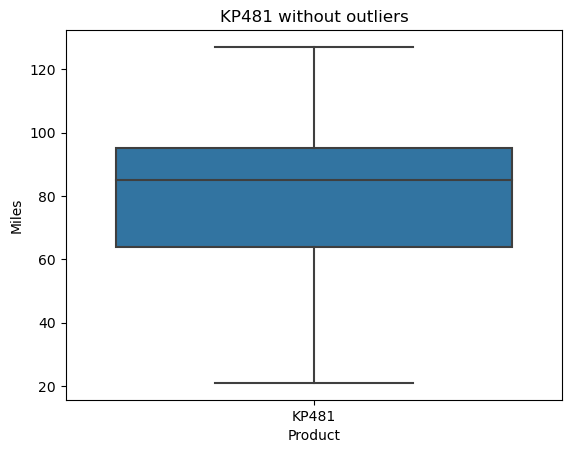

In [181]:
sns.boxplot(x='Product',y='Miles',data=df_22)
plt.title('KP481 without outliers')
plt.show()

# product_ KP781

In [182]:
KP781=df_PM[df_PM['Product']=='KP781']
KP781

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120
142,KP781,22,Male,18,Single,4,5,48556,200
143,KP781,23,Male,16,Single,4,5,58516,140
144,KP781,23,Female,18,Single,5,4,53536,100
145,KP781,23,Male,16,Single,4,5,48556,100
146,KP781,24,Male,16,Single,4,5,61006,100
147,KP781,24,Male,18,Partnered,4,5,57271,80
148,KP781,24,Female,16,Single,5,5,52291,200
149,KP781,24,Male,16,Single,5,5,49801,160


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120
142,KP781,22,Male,18,Single,4,5,48556,200
143,KP781,23,Male,16,Single,4,5,58516,140
144,KP781,23,Female,18,Single,5,4,53536,100
145,KP781,23,Male,16,Single,4,5,48556,100
146,KP781,24,Male,16,Single,4,5,61006,100
147,KP781,24,Male,18,Partnered,4,5,57271,80
148,KP781,24,Female,16,Single,5,5,52291,200
149,KP781,24,Male,16,Single,5,5,49801,160


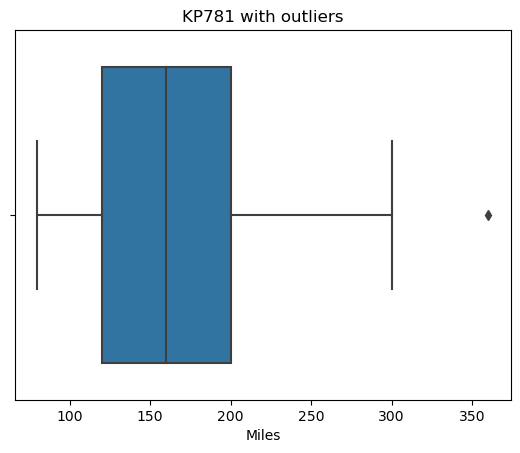

In [183]:
sns.boxplot(data=KP781,x='Miles')
plt.title('KP781 with outliers')
KP781

In [184]:
q3_1=KP781['Miles'].quantile(.25)
q3_1

120.0

In [185]:
q3_3=KP781['Miles'].quantile(.75)
q3_3

200.0

In [186]:
iqr= q3_3 - q3_1
iqr

80.0

In [187]:
lower=q3_1-(1.5)*iqr
lower

0.0

In [188]:
upper=q3_3+(1.5)*iqr
upper

320.0

In [189]:
df_33=KP781[~((KP781['Miles']>q3_3-1.5*iqr)&(KP781['Miles']<q3_3+1.5*iqr))]
df_33

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
147,KP781,24,Male,18,Partnered,4,5,57271,80
173,KP781,35,Male,16,Partnered,4,5,92131,360


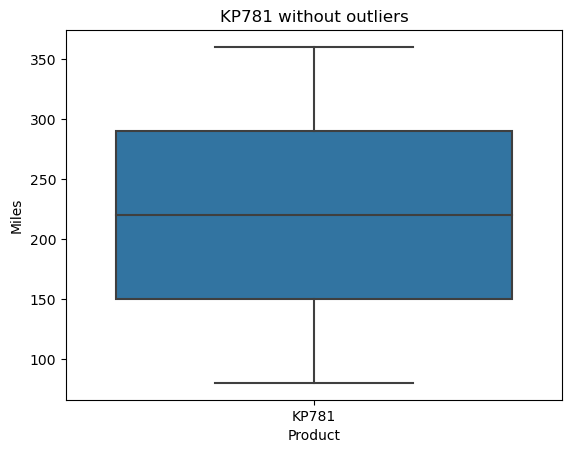

In [190]:
sns.boxplot(x='Product',y='Miles',data=df_33)
plt.title('KP781 without outliers')
plt.show()

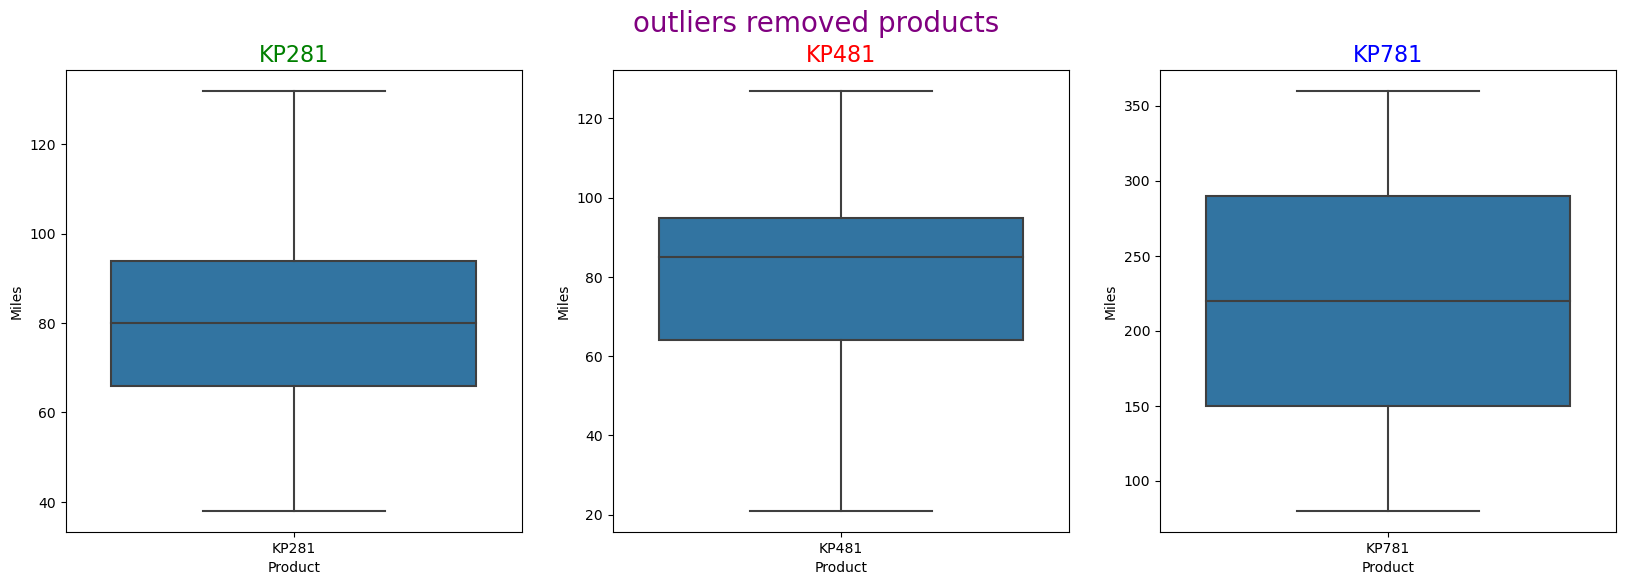

In [191]:
fig,axis=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
sns.boxplot(x='Product',y='Miles',data=df_11,ax=axis[0])
sns.boxplot(x='Product',y='Miles',data=df_22,ax=axis[1])
sns.boxplot(x='Product',y='Miles',data=df_33,ax=axis[2])
axis[0].set_title('KP281',fontsize=16,color='green')
axis[1].set_title('KP481',fontsize=16,color='red')
axis[2].set_title('KP781',fontsize=16,color='blue')
fig.suptitle('outliers removed products',fontsize=20,color='purple')
plt.show()

In [192]:
miles_1=[df_11 ,df_22, df_33]
df_final=pd.concat(miles_1).reset_index()
df_final


,index,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,KP281,18,Male,14,Single,3,4,29562,112
1,1,KP281,19,Male,15,Single,2,3,31836,75
2,2,KP281,19,Female,14,Partnered,4,3,30699,66
3,3,KP281,19,Male,12,Single,3,3,32973,85
4,4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...,...
130,137,KP481,40,Male,16,Partnered,3,3,64809,95
131,138,KP481,45,Male,16,Partnered,2,2,54576,42
132,139,KP481,48,Male,16,Partnered,2,3,57987,64
133,147,KP781,24,Male,18,Partnered,4,5,57271,80


In [193]:
df['Age'] = pd.cut(df['Age'],bins=[17,24,30,36,42,48,54],labels=['18-24','24-30','30-36','36-42','42-48','48-54'])

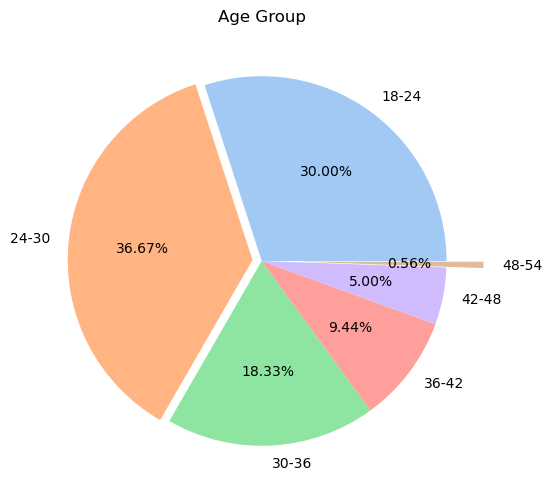

In [194]:
palette_color = sns.color_palette('pastel')
plt.figure(figsize=(6,6))
df_acount=df.groupby(['Age']).aggregate({'Gender':'count'}).reset_index()
plt.pie(df_acount['Gender'],explode=(0,0.05,0,0,0,0.2), labels=df_acount['Age'], colors=palette_color,autopct='%.2f%%')
plt.title('Age Group')
plt.show()

# Product vs Fitness

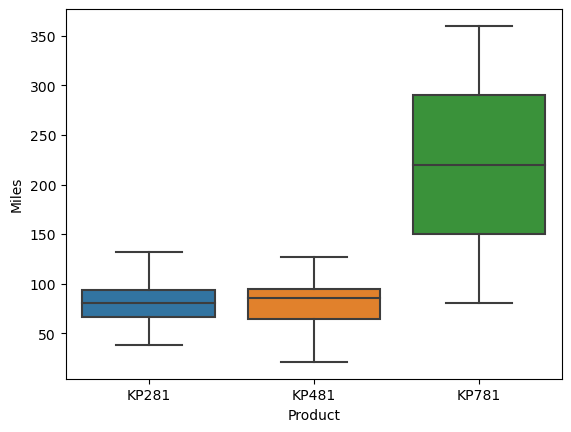

In [195]:
sns.boxplot(data=df_final,x='Product',y='Miles')
plt.show()

# Miles vs Fitness

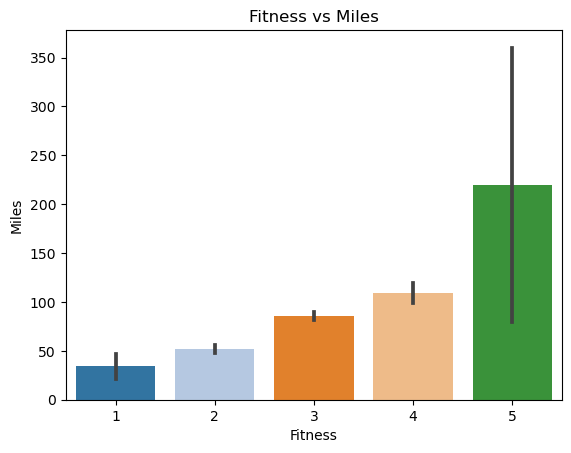

In [196]:
sns.barplot(data=df_final,x='Fitness',y='Miles',palette='tab20')
plt.title('Fitness vs Miles')
plt.show()


people with low fitness level are running below 50kms

people with high  fitness level of 5 are running above 150 kms

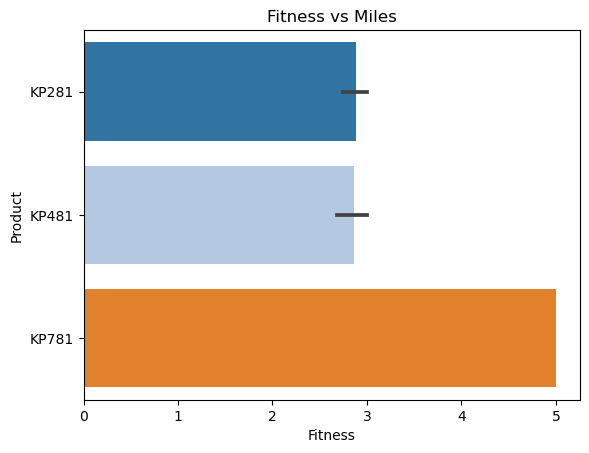

In [197]:
sns.barplot(data=df_final,x='Fitness',y='Product',palette='tab20')
plt.title('Fitness vs Miles')
plt.show()


people with high fitness uses the product KP781

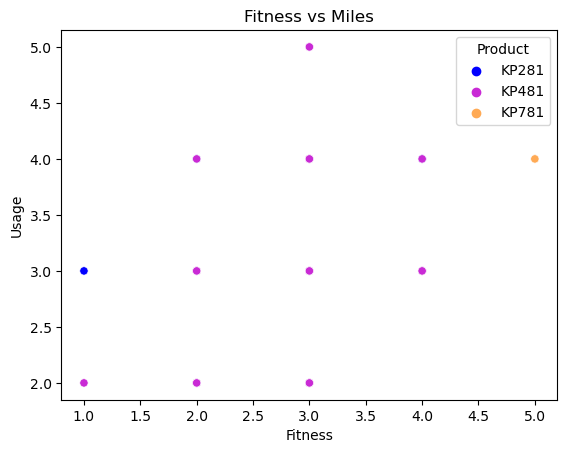

In [198]:
sns.scatterplot(data=df_final,x='Fitness',y='Usage',hue='Product',palette="gnuplot2")
plt.title('Fitness vs Miles')
plt.show()


customer gets fitness as their usage increases

people with high fitness mostly using KP781

# Probability

### Marginal Probabilty

#### Products

In [199]:
a=df['Product'].value_counts(normalize=True)
a

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

#### Gender

In [200]:
b=df['Gender'].value_counts(normalize=True)
b

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

#### Marital Status

In [201]:
c=df['MaritalStatus'].value_counts(normalize=True)
c

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

#### Age

In [221]:
d=df_miles['Age'].value_counts(normalize=True)
d

24-30    0.366667
18-24    0.300000
30-36    0.183333
36-42    0.094444
42-48    0.050000
48-54    0.005556
Name: Age, dtype: float64

####  Income

In [222]:
e=df_miles['Income'].value_counts(normalize=True)
e

40k-60k      0.588889
20k-40k      0.177778
60k-80k      0.127778
80k-100k     0.088889
100k-120k    0.016667
Name: Income, dtype: float64

####   Fitness

In [204]:
f=df['Fitness'].value_counts(normalize=True)
f

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

#### Usage

In [205]:
g=df['Usage'].value_counts(normalize=True)
g

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

#### Education

In [206]:
h=df['Education'].value_counts(normalize=True)
h

16    0.472222
14    0.305556
18    0.127778
15    0.027778
13    0.027778
12    0.016667
21    0.016667
20    0.005556
Name: Education, dtype: float64

# conditional probability

#### Probability of each product given age¶

In [207]:
df_product_age=pd.crosstab(df.Age,df.Product,normalize = 'index')
df_product_age

Product,KP281,KP481,KP781
Age,,,
18-24,0.500000,0.314815,0.185185
24-30,0.424242,0.272727,0.303030
30-36,0.363636,0.515152,0.121212
36-42,0.470588,0.352941,0.176471
42-48,0.444444,0.222222,0.333333
48-54,1.000000,0.000000,0.000000


#### most of the aged people are prefer KP281 to KP481 and KP781

#### KP481 is mostly used by middle aged ( 30-36 ) people

#### most of the youngsters ( 18-24 ) are pefer KP781

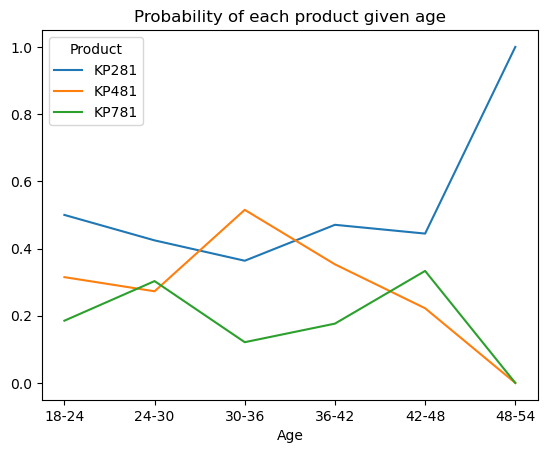

In [208]:
 pa = df_product_age.plot(kind="line")
plt.title('Probability of each product given age')
plt.show()

### Probability of each product given gender

In [209]:
df_productgender=pd.crosstab(df.Gender,df.Product,normalize = 'index')
df_productgender.round(3)

Product,KP281,KP481,KP781
Gender,,,
Female,0.526,0.382,0.092
Male,0.385,0.298,0.317


### For both both  male and female, the probability of occurence of each product is highest for KP281 <br>for female customers they prefer KP281 the most<br>for male they prefer KP481 & KP781 equally

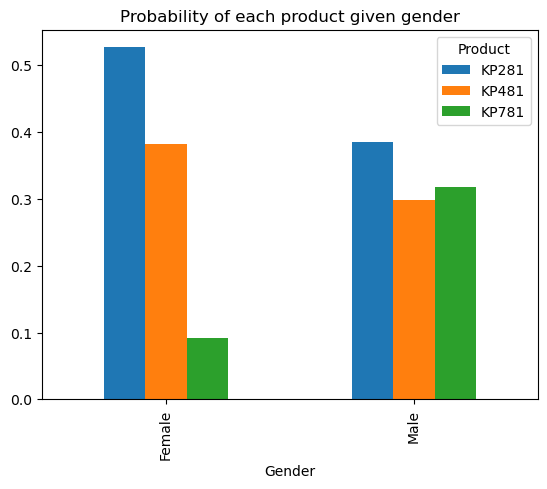

In [210]:
pgg = df_productgender.plot(kind="bar")
plt.title('Probability of each product given gender')
plt.show()

## Probability of each product given marital status

In [211]:
df_product_maritalstatus=pd.crosstab(df.MaritalStatus,df.Product,normalize = 'index')
df_product_maritalstatus

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


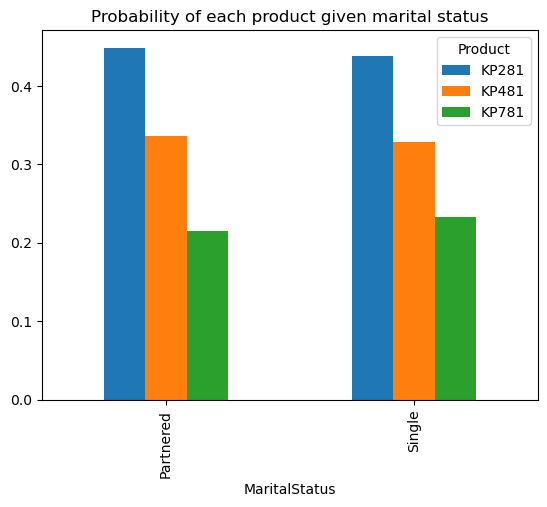

In [212]:
pm = df_product_maritalstatus.plot(kind="bar")
plt.title('Probability of each product given marital status')
plt.show()

### Probability of each product given years of education

In [213]:
df_education_product=pd.crosstab(df.Education,df.Product,normalize = 'index')
df_education_product

Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000


- Customers who studied more than 18 years preferred the product KP781. This product have zero occurences for customers with less education

- The probability for product KP281 to occur is highest when eduaction is happened for 15 years and have zero occurences for 20 and 21 years
- For product KP481, the highest chances occur for customers with education of 13 and 14 years and have zero occurences at 20 and 21 years

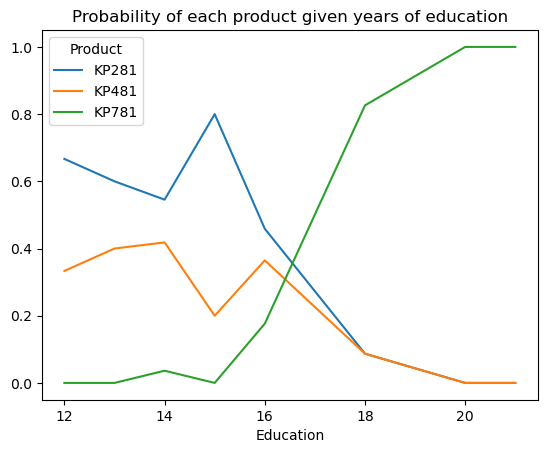

In [214]:
pge = df_education_product.plot(kind="line")
plt.title('Probability of each product given years of education')
plt.show()

Product KP281 have higher chances given lowest income at 20k to 40k and decreases to zero occurence towards higher income
For product KP481, high probability is in between given income of 40k to 80k and falls to zero at higher income
KP781 chances moves from zero and peaks at highest value for given maximum possible income of the customers

### Probability of each fitness scale given marital status


In [215]:
df_fitness_marital=pd.crosstab(df.MaritalStatus,df.Fitness, normalize = 'index')
df_fitness_marital

Fitness,1,2,3,4,5
MaritalStatus,,,,,
Partnered,0.009346,0.168224,0.532710,0.121495,0.168224
Single,0.013699,0.109589,0.547945,0.150685,0.178082


 The probability of each fitness scale for given marital status is highest at 3 out of 5 for both single and partnered customers
Both cases follow similar trend howerver for partnered customers, ocuurence of fitness levels 2 and 5 have same probability

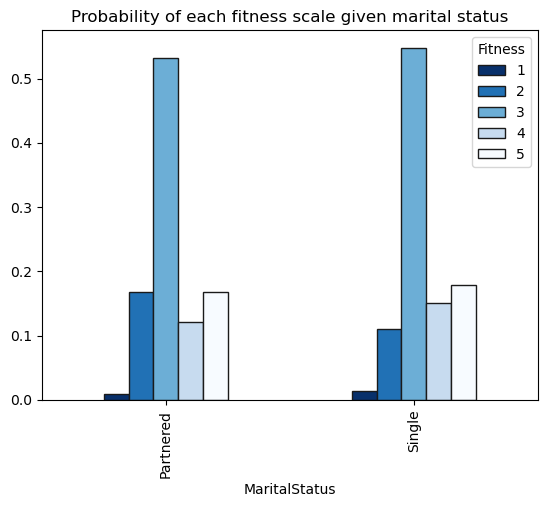

In [216]:
xyz = df_fitness_marital.plot(kind="bar",colormap='Blues_r',edgecolor='0.1')
plt.title('Probability of each fitness scale given marital status')
plt.show()

In [217]:
df_fitness_usage=pd.crosstab(df.Usage,df.Fitness, normalize = 'index')
df_fitness_usage

Fitness,1,2,3,4,5
Usage,,,,,
2,0.030303,0.424242,0.545455,0.000000,0.000000
3,0.014493,0.144928,0.681159,0.144928,0.014493
4,0.000000,0.038462,0.576923,0.134615,0.250000
5,0.000000,0.000000,0.117647,0.352941,0.529412
6,0.000000,0.000000,0.000000,0.142857,0.857143
7,0.000000,0.000000,0.000000,0.000000,1.000000


### The chances for occurence of higher fitness scale happens at higher given product usage per week<br>For given product usage until 4 times per week, scale 3 occurs with more probability, after that scale 4 occur the highest<br>At highest product usage per week at 7 times, there is only occurence of fitness scale at 5 out of 5

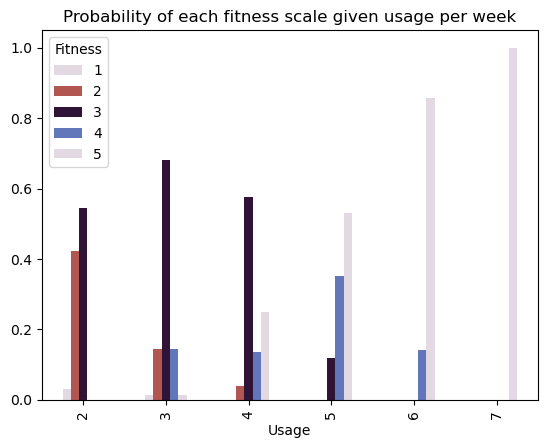

In [218]:
uuc = df_fitness_usage.plot(kind="bar",colormap='twilight_r')
plt.title('Probability of each fitness scale given usage per week')
plt.show()

In [219]:
a=df['Product'].value_counts(normalize=True).reset_index().round(3)
a

,index,Product
0,KP281,0.444
1,KP481,0.333
2,KP781,0.222


In [220]:
price=[1500,1750,2500]
j=0
expected=0
for i in a['Product']:
    expected = expected + (i*price[j])
    j+=1
total = expected*100    
print('Expected price for selling 100 treadmills is : $',total)

Expected price for selling 100 treadmills is : $ 180375.0


### After customers purchase 100 products, the total expected price received by the seller is around :$180375.00 dollars

# Insights and Recommendations¶

#### Customer who are partnered, is more likely to purchase the product.we should recommend more products among partnered customers

#### Increse in education results in increased miles running per week. This means that educated people understand importance of getting in shape : So, sell more KP781 products to highly educated customers.

#### the customer who is fit(fitness=5) tend to buy product KP781.so recommend KP781 to them

#### For customers running 50 to 150 miles per week, they prefer products KP281, KP481. For long runners 150 to 300 miles per week, they prefer product is KP781 : So, for facilities like gym, rehabilitation centres, etc,. we could recommend the product KP781

#### Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product. While the other customers are likely to purchasing KP281 or KP481.

#### most of the aged customers prefer KP281 to KP781 & KP481. so recommend KP281 to those customers

#### After customers purchase 100 products, the total expected price received by the seller is $180375.00dollars:<br>By recommending more sales in products KP481 and KP781 we can improve the total revenue